In [1]:
import wandb
api = wandb.Api()
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
#%matplotlib gtk3

## This notebook deals with HIRO in a sparse reward reaching task
 $r_{sparse} =  \left\{\begin{array}{ll}
      0  &\textrm{if d}(\mathbf{ee}, \mathbf{b}) < 0.08 \\
      -1 & \textrm{otherwise}
    \end{array}\right.$
    
Box is non-interactive and randomly spawns in reachable radius around agent on the table.

Episode length: 300 s

In [2]:
def get_df_selection(df, key, cond):
    '''Take only elements from the DataFrame where the *key* matches *cond*:bool'''
    elems = []
    for i in range(df.shape[0]):
        try:
            if df['config'][i][key] == cond:
                elems.append(df.loc[i, :])
        except:
            elems.append(df.loc[i, :])
    print(len(elems))
    return pd.DataFrame.from_records(elems)
    
def cumulative_reward(x, verbose=False):
    '''Plots R(n) where R(n) is the same of the graph from 0 to n. Essentially 
    a simple discrete integration.'''
    if verbose:
        print(f"Run length: {len(x)}")
    # Basically ignore faulty runs
    if len(x) == 0:
        return np.zeros(shape=[0,])
    ret = np.zeros([len(x),])
    ret[0] = 0
    for i in range(1, len(x)):
        ret[i] = ret[i-1] + x[i]
    return ret

def plotter(df, keys, f=None):
    '''Basic plotting utility that can apply a function on the data.'''
    f = [f if f else lambda x: x][0]
    fig, axes = plt.subplots(nrows=2, ncols=2)
    fig.set_figwidth(16)
    fig.set_figheight(8)
    for ax_idx, ax in enumerate(axes.flatten()):
        for i in range(df.shape[0]):
            data = df[keys[ax_idx]][i]
            steps = df['_step'][i]
            steps = np.linspace(0, steps[-1], len(data))
            ax.plot(steps, f(data))
            ax.set(title=keys[ax_idx], xlabel='steps')#, xlim=[0,1.4e6])
    plt.legend([x for x in df['name']], loc='lower left')
    
def plot_saver(df, key, f=None):
    '''Basic plotting utility that can apply a function on the data.'''        
    ylab = ['Success Rate' if not f else 'Cumulative Success Rate'][0]
    name = ['success_rate.eps' if not f else 'cumul_success_rate.eps'][0]
    f = [f if f else lambda x: x][0]
    fig, ax = plt.subplots()
    fig.set_figwidth(7)
    fig.set_figheight(4)
    for i in range(1, df.shape[0]):
        data = df[key][i]
        steps = df['_step'][i]
        steps = np.linspace(0, steps[-1], len(data))
        ax.plot(steps, f(data), linewidth=2)
        ax.set(title=key, xlabel='steps', ylabel=ylab, xlim=[0,1.4e6])
    fig.savefig(name)

        #plt.legend([x for x in df['name']], loc='lower left')    

15
10
5
15
5
10
5
5
15
10
15
10
5
15
5
5
10
5
5
10
5
5


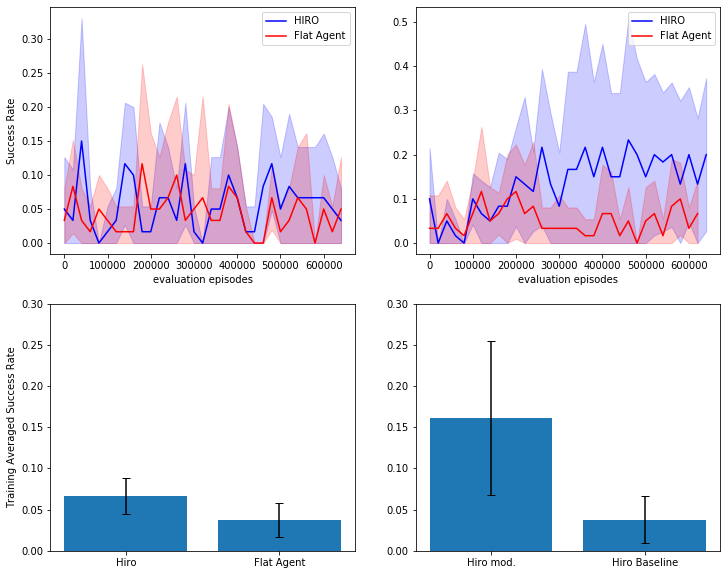

In [28]:

key = 'eval/success_rate'
length = 50
plt.figure(figsize=(12, 10))


# Sparse rew HIRO c=5 and c=20 vs flat | Average average ---------------------------------------------------
plt.subplot(223)
result_mean = []
result_std = []
for c in [5]:
    df = pd.read_pickle('sparse_exp.pyc')
    df = get_df_selection(df, 'sparse_rew', 1)
    df = get_df_selection(df, 'flat_agent', 0)
    df = get_df_selection(df, 'c_step', c)
    meaner = np.zeros([1, 5])
    for i in range(5):
        run = df.iloc[i].loc[key]
        run = np.reshape(run, [1, run.shape[0]])
        run_mean = np.mean(run[:, :length], axis=1)
        meaner[0, i] = run_mean
    stder = np.std(meaner)
    meaner = np.mean(meaner)
    result_mean.append(meaner)
    result_std.append(stder)

df = pd.read_pickle('sparse_exp.pyc')
df = get_df_selection(df, 'sparse_rew', 1)
df = get_df_selection(df, 'flat_agent', 1)
meaner = np.zeros([1, 5])
for i in range(4):
    run = df.iloc[i].loc[key]
    run = np.reshape(run, [1, run.shape[0]])
    run_mean = np.mean(run[:, :length], axis=1)
    meaner[0, i] = run_mean
stder = np.std(meaner)
meaner = np.mean(meaner)
result_mean.append(meaner)
result_std.append(stder)

plt.title('')
x_range = [1, 2]
plt.bar(x_range, result_mean, yerr=result_std, capsize=4)
plt.xticks(x_range, ('Hiro', 'Flat Agent'))
plt.ylim([0, 0.3])
plt.ylabel('Training Averaged Success Rate')

#-------------------------------------------------------------------------------------------------------
plt.subplot(224)
length = int(660/20)
result_mean = []
result_std = []
for c in [5]:
    df = pd.read_pickle('experimenta.pyc')
    df = get_df_selection(df, 'sparse_rew', 1)
    df = get_df_selection(df, 'flat_agent', 0)
    df = get_df_selection(df, 'c_step', c)
    meaner = np.zeros([1, 5])
    for i in range(5):
        run = df.iloc[i].loc[key]
        run = np.reshape(run, [1, run.shape[0]])
        run_mean = np.mean(run[:,:length], axis=1)
        meaner[0, i] = run_mean
    stder = np.std(meaner)
    meaner = np.mean(meaner)
    result_mean.append(meaner)
    result_std.append(stder)

df = pd.read_pickle('sparse_exp.pyc')
df = get_df_selection(df, 'sparse_rew', 1)
df = get_df_selection(df, 'flat_agent', 0)
meaner = np.zeros([1, 5])
for i in range(4):
    run = df.iloc[i].loc[key]
    run = np.reshape(run, [1, run.shape[0]])
    run_mean = np.mean(run[:,:length], axis=1)
    meaner[0, i] = run_mean
stder = np.std(meaner)
meaner = np.mean(meaner)
result_mean.append(meaner)
result_std.append(stder)

x_range = [1, 2]
plt.bar(x_range, result_mean, yerr=result_std, capsize=4)
plt.xticks(x_range, ('Hiro mod.', 'Hiro Baseline'))
plt.ylim([0, 0.3])

#---------------------------------------------------------------------------

length = int(660/20)
plt.subplot(221)
results = np.zeros([1, length])
for c in [5]:
    df = pd.read_pickle('sparse_exp.pyc')
    df = get_df_selection(df, 'sparse_rew', 1)
    df = get_df_selection(df, 'flat_agent', 0)
    df = get_df_selection(df, 'c_step', c)
    for i in range(5):
        run = df.iloc[i].loc[key]
        run = np.reshape(run, [1, run.shape[0]])
        results = np.concatenate([results, run[:, :length]], axis=0)
    mean = np.mean(results, axis=0)
    std = np.std(results, axis=0)
    
    x_range = np.arange(0, length) * 20000
    plt.plot(x_range, mean, color='b')
    plt.fill_between(x_range, np.maximum(mean - std, 0), np.minimum(mean + std, 1.0),
       color='b', alpha=0.2)

length = int(660/20)
results = np.zeros([1, length])
for c in [40]:
    df = pd.read_pickle('sparse_exp.pyc')
    df = get_df_selection(df, 'sparse_rew', 1)
    df = get_df_selection(df, 'flat_agent', 1)
    df = get_df_selection(df, 'c_step', c)
    for i in range(5):
        run = df.iloc[i].loc[key]
        run = np.reshape(run, [1, run.shape[0]])
        results = np.concatenate([results, run[:, :length]], axis=0)
    mean = np.mean(results, axis=0)
    std = np.std(results, axis=0)
    
    x_range = np.arange(0, length) * 20000
    plt.plot(x_range, mean, color='r')
    plt.fill_between(x_range, np.maximum(mean - std, 0), np.minimum(mean + std, 1.0),
       color='r', alpha=0.2)
    
plt.xlabel('evaluation episodes')
plt.ylabel('Success Rate')
plt.legend(['HIRO', 'Flat Agent'])
#--------------------------------------------------------------------------------------

length = int(660/20)
plt.subplot(222)
results = np.zeros([1, length])
for c in [5]:
    df = pd.read_pickle('experimenta.pyc')
    df = get_df_selection(df, 'sparse_rew', 1)
    df = get_df_selection(df, 'flat_agent', 0)
    df = get_df_selection(df, 'c_step', c)
    for i in range(5):
        run = df.iloc[i].loc[key]
        run = np.reshape(run, [1, run.shape[0]])
        results = np.concatenate([results, run[:, :length]], axis=0)
    mean = np.mean(results, axis=0)
    std = np.std(results, axis=0)
    
    x_range = np.arange(0, length) * 20000
    plt.plot(x_range, mean, color='b')
    plt.fill_between(x_range, np.maximum(mean - std, 0), np.minimum(mean + std, 1.0),
       color='b', alpha=0.2)

length = int(640/20)
results = np.zeros([1, length])
for c in [40]:
    df = pd.read_pickle('experimenta.pyc')
    df = get_df_selection(df, 'sparse_rew', 1)
    df = get_df_selection(df, 'flat_agent', 1)
    df = get_df_selection(df, 'c_step', c)
    for i in range(5):
        run = df.iloc[i].loc[key]
        run = np.reshape(run, [1, run.shape[0]])
        results = np.concatenate([results, run[:, :length]], axis=0)
    mean = np.mean(results, axis=0)
    std = np.std(results, axis=0)
    
    x_range = np.arange(0, length) * 20000
    plt.plot(x_range, mean, color='r')
    plt.fill_between(x_range, np.maximum(mean - std, 0), np.minimum(mean + std, 1.0),
       color='r', alpha=0.2)
    
plt.xlabel('evaluation episodes')
plt.legend(['HIRO', 'Flat Agent'])
plt.savefig('sparse.pdf')

15
10
5
15
10
5


Text(0, 0.5, 'Training averaged success rate')

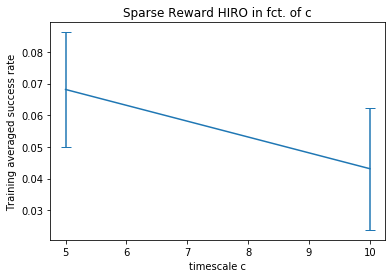

In [21]:
result_mean = []
result_std = []
for c in [5, 10]:
    df = pd.read_pickle('sparse_exp.pyc')
    df = get_df_selection(df, 'sparse_rew', 1)
    df = get_df_selection(df, 'flat_agent', 0)
    df = get_df_selection(df, 'c_step', c)
    meaner = np.zeros([1, 5])
    for i in range(5):
        run = df.iloc[i].loc[key]
        run = np.reshape(run, [1, run.shape[0]])
        run_mean = np.mean(run[:,:length], axis=1)
        meaner[0, i] = run_mean
    stder = np.std(meaner)
    meaner = np.mean(meaner)
    result_mean.append(meaner)
    result_std.append(stder)
plt.title('Sparse Reward HIRO in fct. of c')
plt.errorbar([5, 10], result_mean, yerr=result_std, capsize=5)
plt.xlabel('timescale c')
plt.ylabel('Training averaged success rate')

14
4


In [13]:
df

,name,config,_step,eval/eval_ep_rew,eval/eval_intr_rew,eval/success_rate,c_step,ep_rew
0,noble-sun-21,"{'env': 'Vrep', 'log': True, 'tau': 0.005, 'na...","[1561, 5172, 5316, 9563, 10135, 12437, 13616, ...","[-299.0, -291.4, -299.0, -279.8, -299.0, -299....","[-530.2763671875, -515.32109375, -522.70048828...","[0.0, 0.1, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10....","[-299.0, -299.0, -299.0, -299.0, -299.0, -157...."
1,eternal-tree-20,"{'env': 'Vrep', 'log': True, 'tau': 0.005, 'na...","[2756, 7940, 15397, 15911, 16052, 17258, 18320...","[-289.9, -299.0, -299.0, -299.0, -293.7, -299....","[-514.35625, -506.278271484375, -477.657324218...","[0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.2, 0.0, ...","[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10....","[-299.0, -299.0, -299.0, -72.0, -299.0, -299.0..."
2,stoic-meadow-17,"{'env': 'Vrep', 'log': True, 'tau': 0.005, 'na...","[5216, 5895, 7292, 7516, 10113, 12651, 15109, ...","[-293.9, -299.0, -299.0, -299.0, -299.0, -272....","[-484.22451171875, -529.19912109375, -524.4995...","[0.1, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, ...","[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10....","[-299.0, -187.0, -299.0, -299.0, -299.0, -299...."
3,magic-breeze-17,"{'env': 'Vrep', 'log': True, 'tau': 0.005, 'na...","[900, 4598, 10440, 16397, 17947, 18458, 19025,...","[-299.0, -299.0, -299.0, -299.0, -299.0, -275....","[-518.03916015625, -498.74521484375, -478.8072...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.2, 0.0, ...","[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10....","[-299.0, -299.0, -299.0, -178.0, -299.0, -299...."
4,logical-oath-19,"{'env': 'Vrep', 'log': True, 'tau': 0.005, 'na...","[2112, 5541, 6067, 7165, 13449, 19435, 19592, ...","[-278.0, -298.5, -299.0, -295.9, -299.0, -299....","[-468.493603515625, -509.297119140625, -509.34...","[0.1, 0.1, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10....","[-299.0, -299.0, -299.0, -299.0, -299.0, -299...."
5,rural-salad-5,"{'env': 'Vrep', 'log': True, 'tau': 0.005, 'na...","[282, 5447, 5813, 7431, 11371, 12363, 19078, 2...","[-292.6, -273.0, -299.0, -299.0, -299.0, -280....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.1, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[-299.0, -299.0, -299.0, -299.0, -299.0, -299...."
6,effortless-totem-2,"{'env': 'Vrep', 'log': True, 'tau': 0.005, 'na...","[10737, 11838, 12132, 12432, 13946, 14420, 180...","[-273.7, -271.9, -277.2, -299.0, -289.3, -299....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.1, 0.2, 0.1, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[-299.0, -299.0, -299.0, -299.0, -299.0, -202...."
7,daily-donkey-3,"{'env': 'Vrep', 'log': True, 'tau': 0.005, 'na...","[3936, 10348, 16417, 17086, 22532, 22715, 2791...","[-299.0, -286.9, -299.0, -299.0, -299.0, -299....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[-205.0, -299.0, -299.0, -299.0, -299.0, -299...."
8,ethereal-sound-3,"{'env': 'Vrep', 'log': True, 'tau': 0.005, 'na...","[862, 2830, 4367, 4996, 6082, 11015, 18645, 19...","[-299.0, -276.8, -299.0, -299.0, -279.9, -299....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.1, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[-299.0, -299.0, -299.0, -299.0, -299.0, -299...."
9,smooth dense,"{'env': 'Vrep', 'log': True, 'tau': 0.005, 'na...","[1750, 6420, 7945, 8880, 9489, 10574, 12907, 1...","[-262.993994140625, -257.745947265625, -197.52...","[-372.18330078125, -410.346826171875, -376.226...","[0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.1, ...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[-313.16510009765625, -219.3062286376953, -472..."
